# Load necessary packages and classes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import pandas as pd
import seaborn as sns
from scipy import signal

# Simulate network for specific parameters

In [ ]:
from NetworkSTDall import NetworkSTDall

In [4]:
#Define network parameters to run simulations
Dnumber = 0.7
Fnumber = 0.7
p0_stf = 0.7
t0 = 0
tf = 10000
h=0.05

#Run simulation
NetworkSTDall(Dnumber, Fnumber, t0, tf, h, p0_stf)

--------------------------  STD - NETWORK  ---------------------------
----------------------------- Data loaded  ---------------------------
P shape:  (320, 320)
ExcInh shape before reshape:  (1, 320)
ExcInh shape after reshape:  (320,)
----------------------------- Simulation parameters  ---------------------------
Depression factor, fD:  0.7
Facilitation factor, fF:  0.7
Initial time, t0:  0
Final time, tf:  10000
Runge-kutta step, h:  0.05
Number of rk45 iterations, N:  200000
Number of neurons in the network, Nneurons:  320
Number of equations for each neuron, neq:  20
Number of total variables in the network, nvar = Nneuronsxneq:  6400
Actual i:  1000
Actual i:  2000
Actual i:  3000
Actual i:  4000
Actual i:  5000
Actual i:  6000
Actual i:  7000
Actual i:  8000
Actual i:  9000
Actual i:  10000
Actual i:  11000
Actual i:  12000
Actual i:  13000
Actual i:  14000
Actual i:  15000
Actual i:  16000
Actual i:  17000
Actual i:  18000
Actual i:  19000
Actual i:  20000
Actual i:  21000
Ac

# Load network results

In [3]:
from TreatNetworkData import TreatNetworkData
from Tools import plot_IFRnetwork

In [4]:
Dnumber = 0.84
Fnumber = 1
h = 0.05

file_name = "fD"+str(Dnumber)+"_fF"+str(Fnumber)+".npz"
NetworkData = TreatNetworkData(file_name,Dnumber,Fnumber,h)

### Get tolerance used in the simulation

In [5]:
tol = NetworkData.get_tol()

### Get colors used to plot data of excitatory and inhibitory populations

In [6]:
ExcColor,InhColor = NetworkData.get_ExcInhColors()

### Get number of neurons used in the simulation

In [7]:
nNeurons = NetworkData.get_nNeurons()

## Plot specific variable of specific neuron 

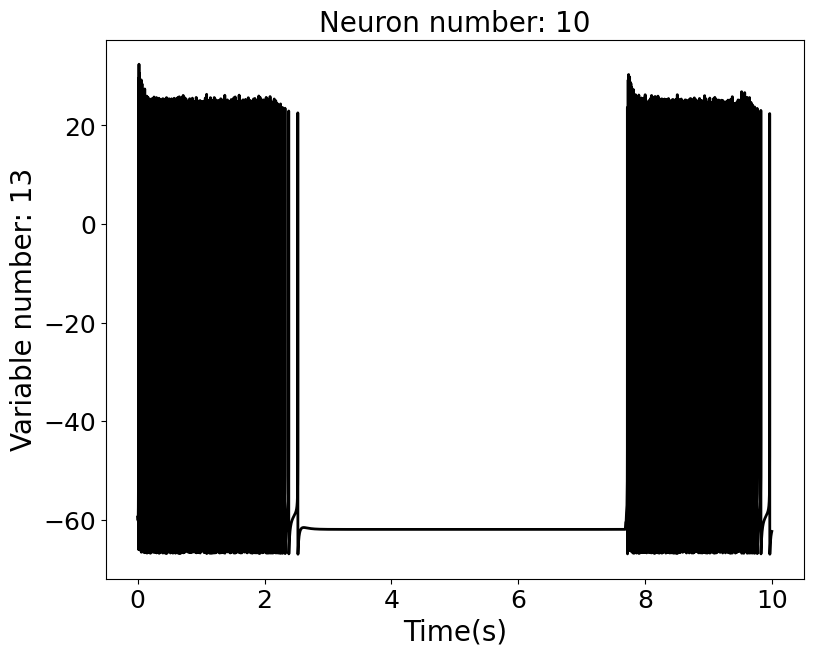

In [10]:
variable_number = 13
neuron_number = 10
time = NetworkData.get_time()
variable = NetworkData.get_variable_neuron(neuron_number,variable_number)
fig=plt.figure(figsize=(9,7))
plt.plot(time/1000,variable,linewidth=2,color='k')
plt.title("Neuron number: "+str(neuron_number),fontsize=20)
plt.xlabel("Time(s)",fontsize=20)
plt.ylabel("Variable number: "+str(variable_number),fontsize=20)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
#plt.savefig("Variable_neuron.png")

# Plot probability of release

In [11]:
avg_pRelAMPA,avg_pRelNMDA,avg_pRelGABA,avg_pRel_stfAMPA,avg_pRel_stfNMDA,avg_pRel_stfGABA = NetworkData.getAveragePrel()

### Prel depression arrays

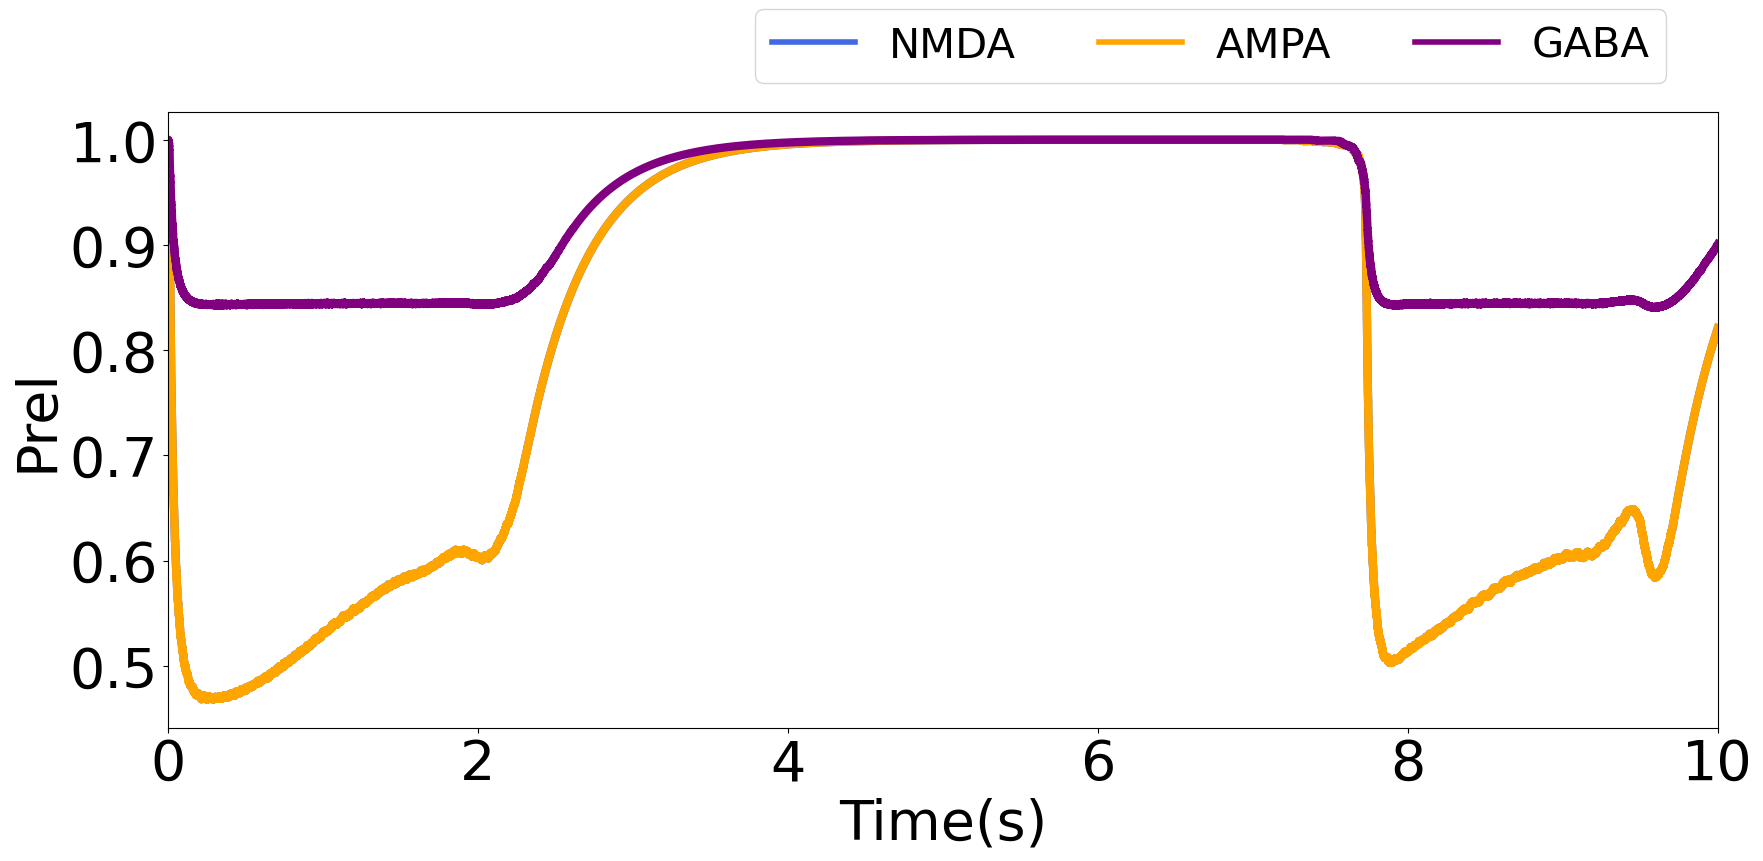

In [22]:
plastic_type = 'D'
fig = NetworkData.plotAveragePrel(avg_pRelAMPA, avg_pRelNMDA, avg_pRelGABA,plastic_type)

### Prel facilitation arrays

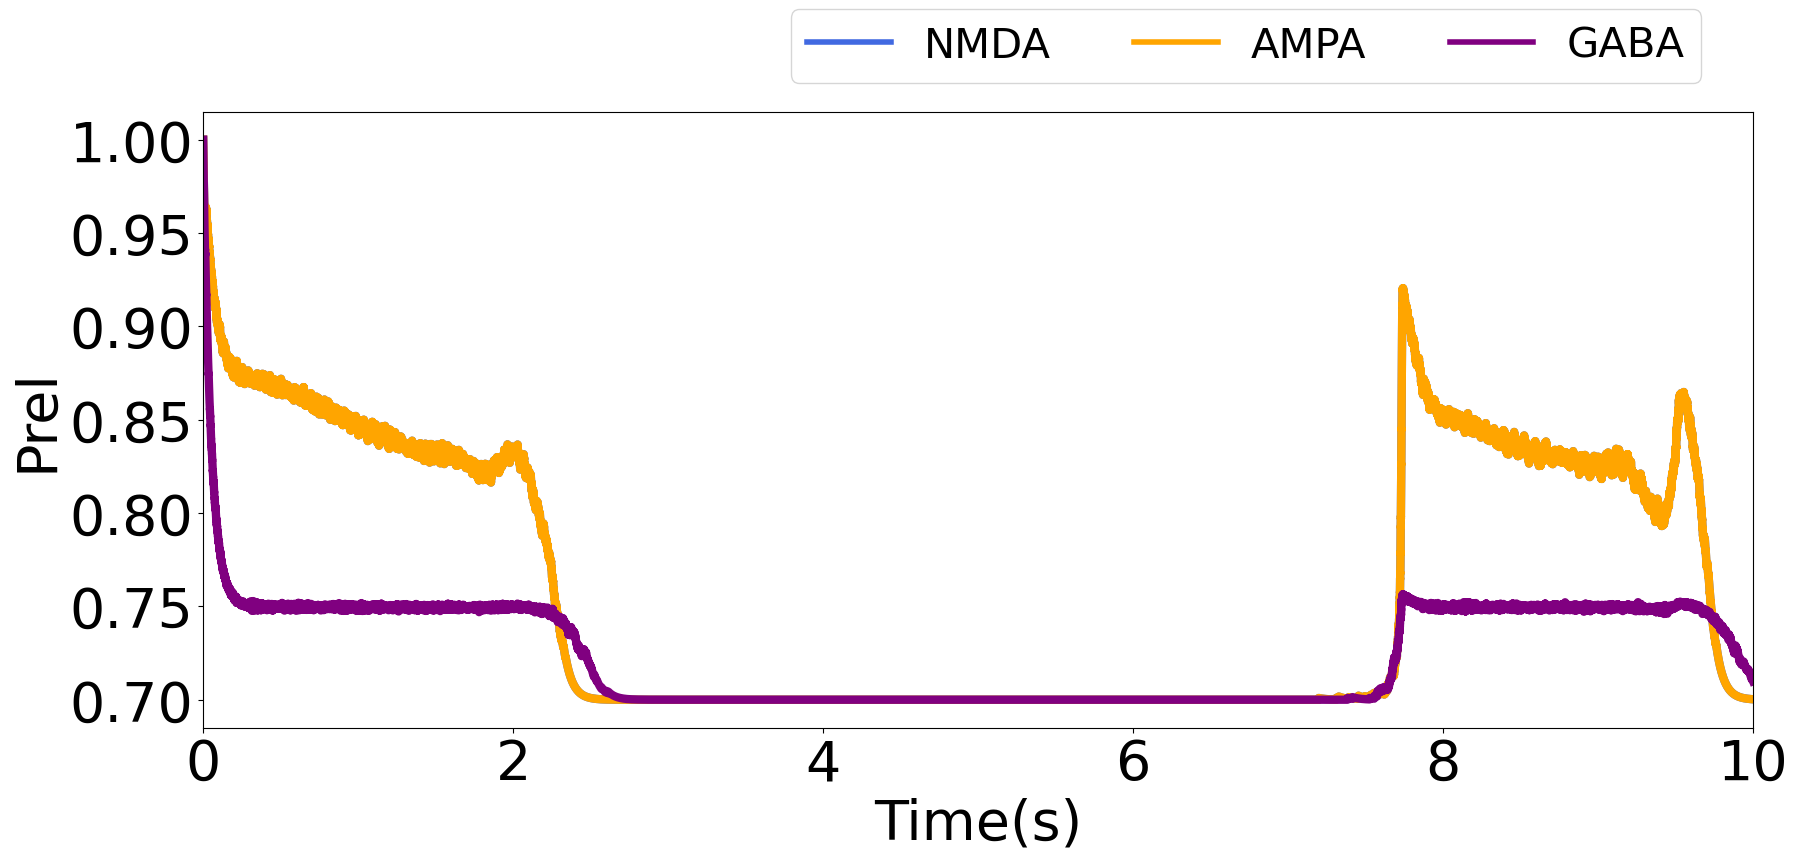

In [23]:
plastic_type = 'F'
fig = NetworkData.plotAveragePrel(avg_pRel_stfAMPA, avg_pRel_stfNMDA, avg_pRel_stfGABA,plastic_type)

## Compute firing_matrix and voltage_peak matrix

Firing_matrix: Contains 1 if neuron at that position fires a spike at time t, otherwise contains 0

VoltagePeak_matrix: Contains the peak of the spike fired at time t

In [24]:
firing_matrix,voltagePeak_matrix = NetworkData.firing_amplitude_matrix()

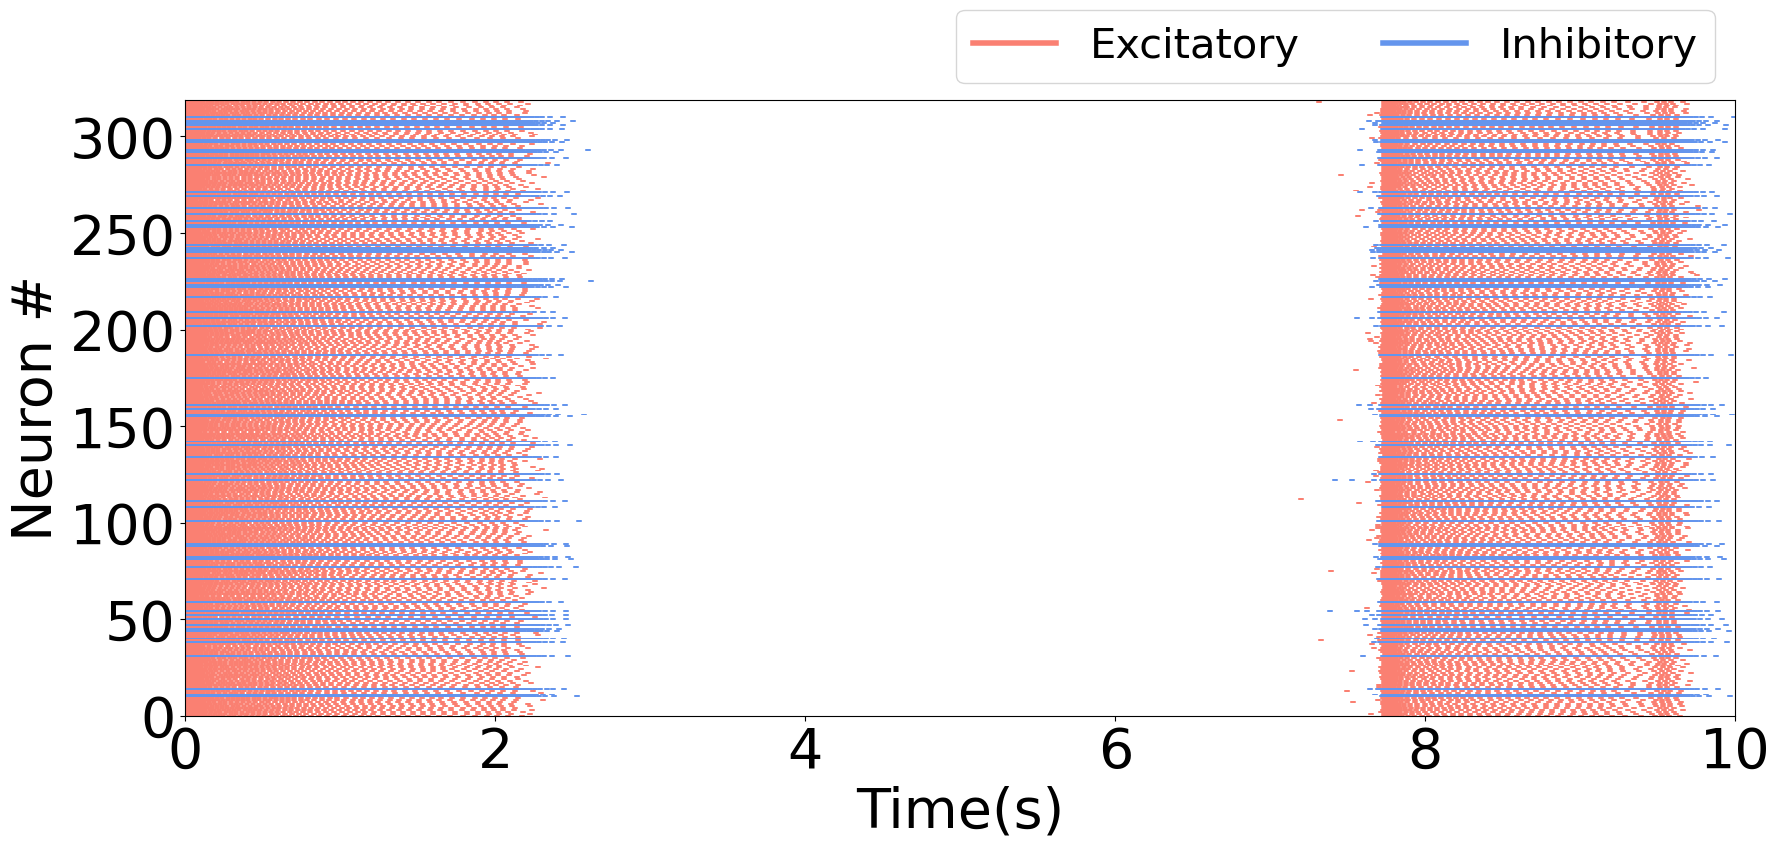

In [25]:
fig = NetworkData.eventplotFiring(firing_matrix)
fig

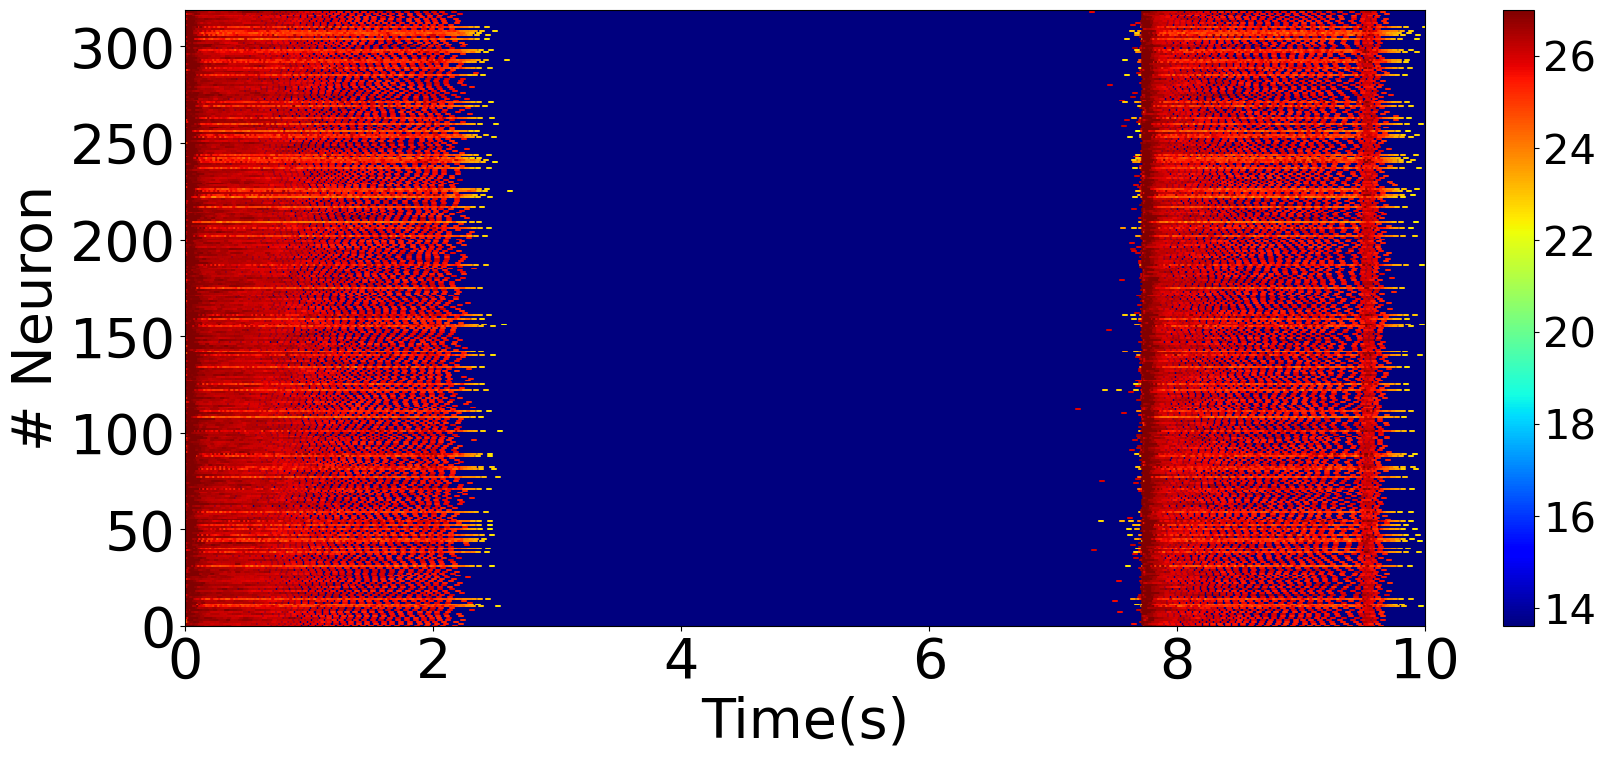

In [26]:
fig = NetworkData.eventplotAmplitude(firing_matrix,voltagePeak_matrix)
fig

# 2. Calculate dataframes with spikes and ISI statistics of the network

In [27]:
df_ISI,df_nSpikes,d_fr = NetworkData.count_spike_bins(firing_matrix,1000) #length del bin en ms

In [28]:
df_ISI

Neuron #        Type  ISI (ms)
0             0  Excitatory     10.60
1             0  Excitatory      9.15
2             0  Excitatory     11.85
3             0  Excitatory     14.75
4             0  Excitatory     18.10
...         ...         ...       ...
35969       319  Excitatory    100.95
35970       319  Excitatory     94.50
35971       319  Excitatory     52.30
35972       319  Excitatory     49.45
35973       319  Excitatory     80.55

[35974 rows x 3 columns]

In [29]:
df_nSpikes

Neuron #        Type   Bin  numSpikes
0            0  Excitatory   0-1         29
1            0  Excitatory   1-2         15
2            0  Excitatory   2-3          3
3            0  Excitatory   3-4          0
4            0  Excitatory   4-5          0
...        ...         ...   ...        ...
3195       319  Excitatory   5-6          0
3196       319  Excitatory   6-7          0
3197       319  Excitatory   7-8         11
3198       319  Excitatory   8-9         15
3199       319  Excitatory  9-10          9

[3200 rows x 4 columns]

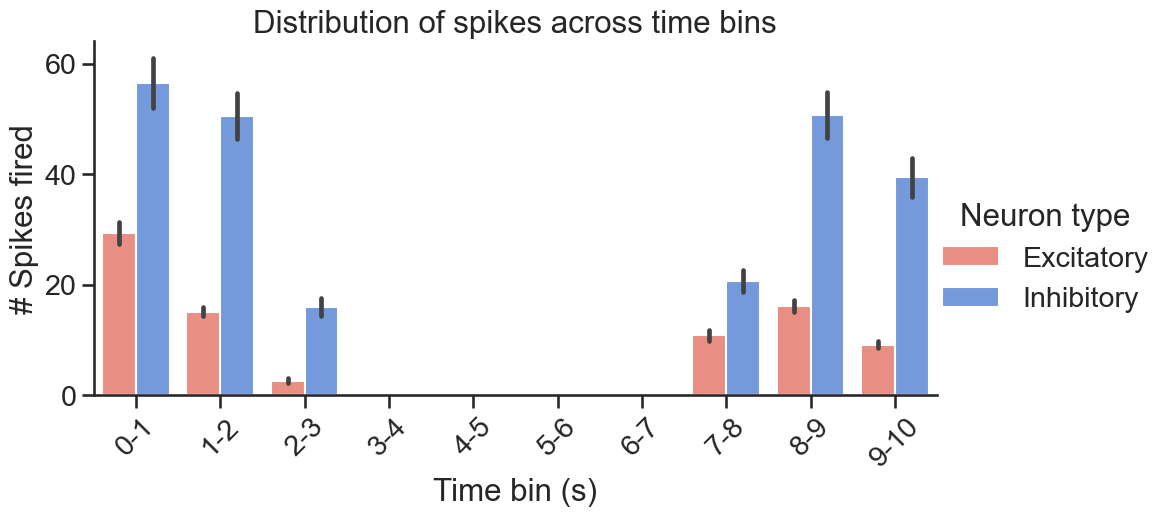

In [35]:
NetworkData.plot_spike_distribution(df_nSpikes)

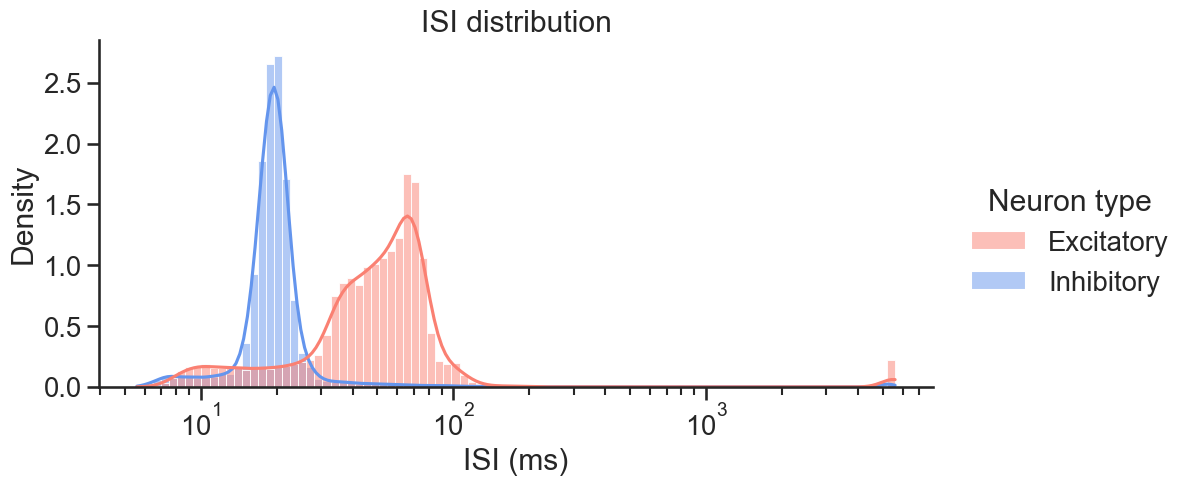

In [36]:
NetworkData.plot_ISIdistribution(df_ISI)

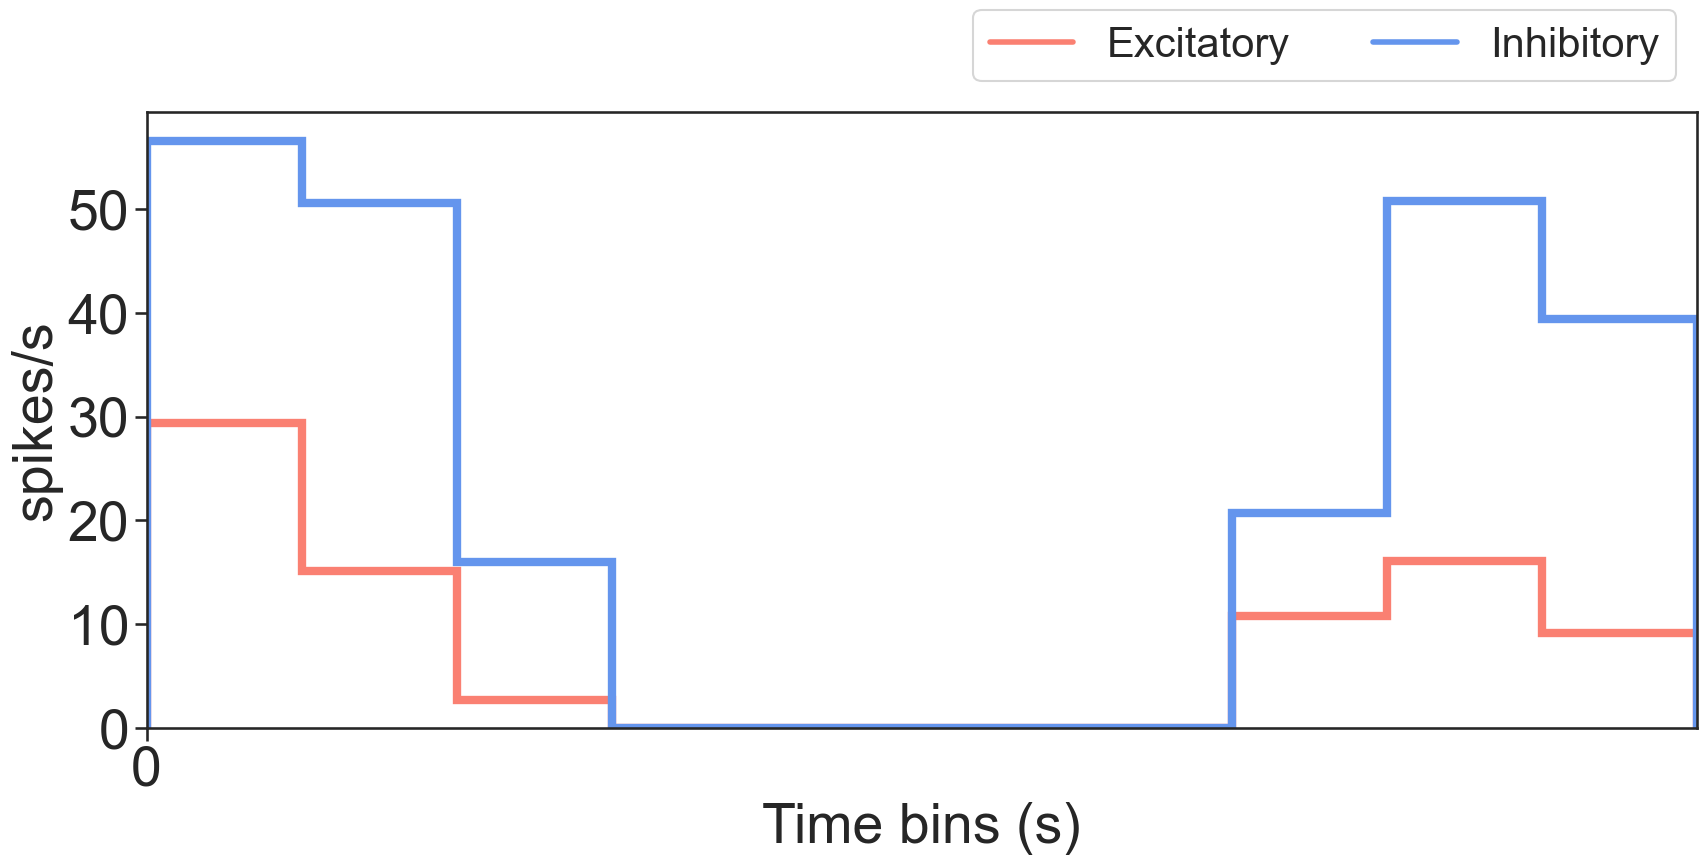

In [39]:
NetworkData.plot_firing_rate(d_fr)

In [33]:
window_type="rectangular"
window_width=100

window = signal.windows.boxcar(int(window_width/0.05))
#spikes_vector=firing_matrix[11]
map_output, Exc, Inh = NetworkData.IFRnetwork(window_type, window_width,firing_matrix)


In [40]:
file = "fD"+str(Dnumber)+"_fF"+str(Fnumber)+'/NetworkIFR.npz'
#file = 'NetworkIFR.npz'
fig1,fig2,Exc_mean,Inh_mean = NetworkData.plot_IFRnetwork(file)

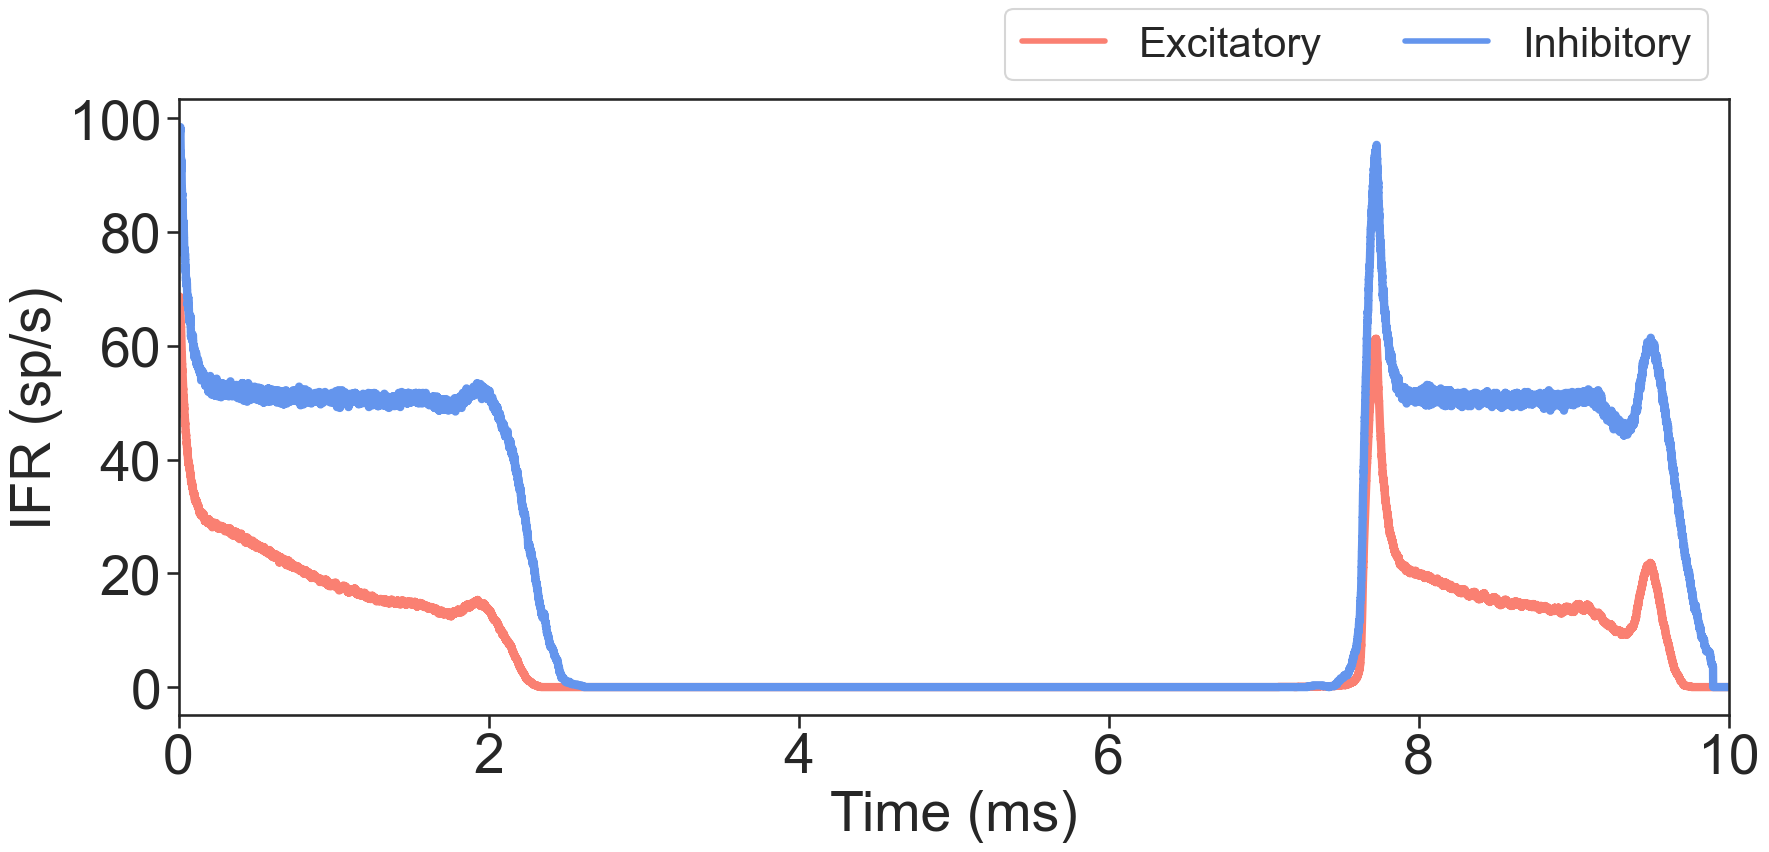

In [41]:
fig1

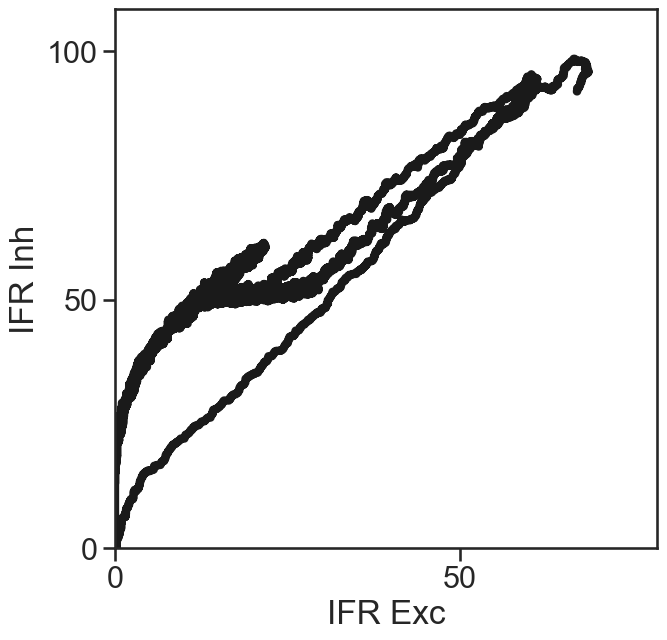

In [42]:
fig2

# Individual neuron spectrums

## Raw periodogram and Danielle periodogram

In [46]:
neuronExcVoltage = NetworkData.get_variable_neuron(1,1)
neuronInhVoltage = NetworkData.get_variable_neuron(10,13)
fig1,fig2 = NetworkData.RawPeriodogramFFT(neuronExcVoltage, neuronInhVoltage)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


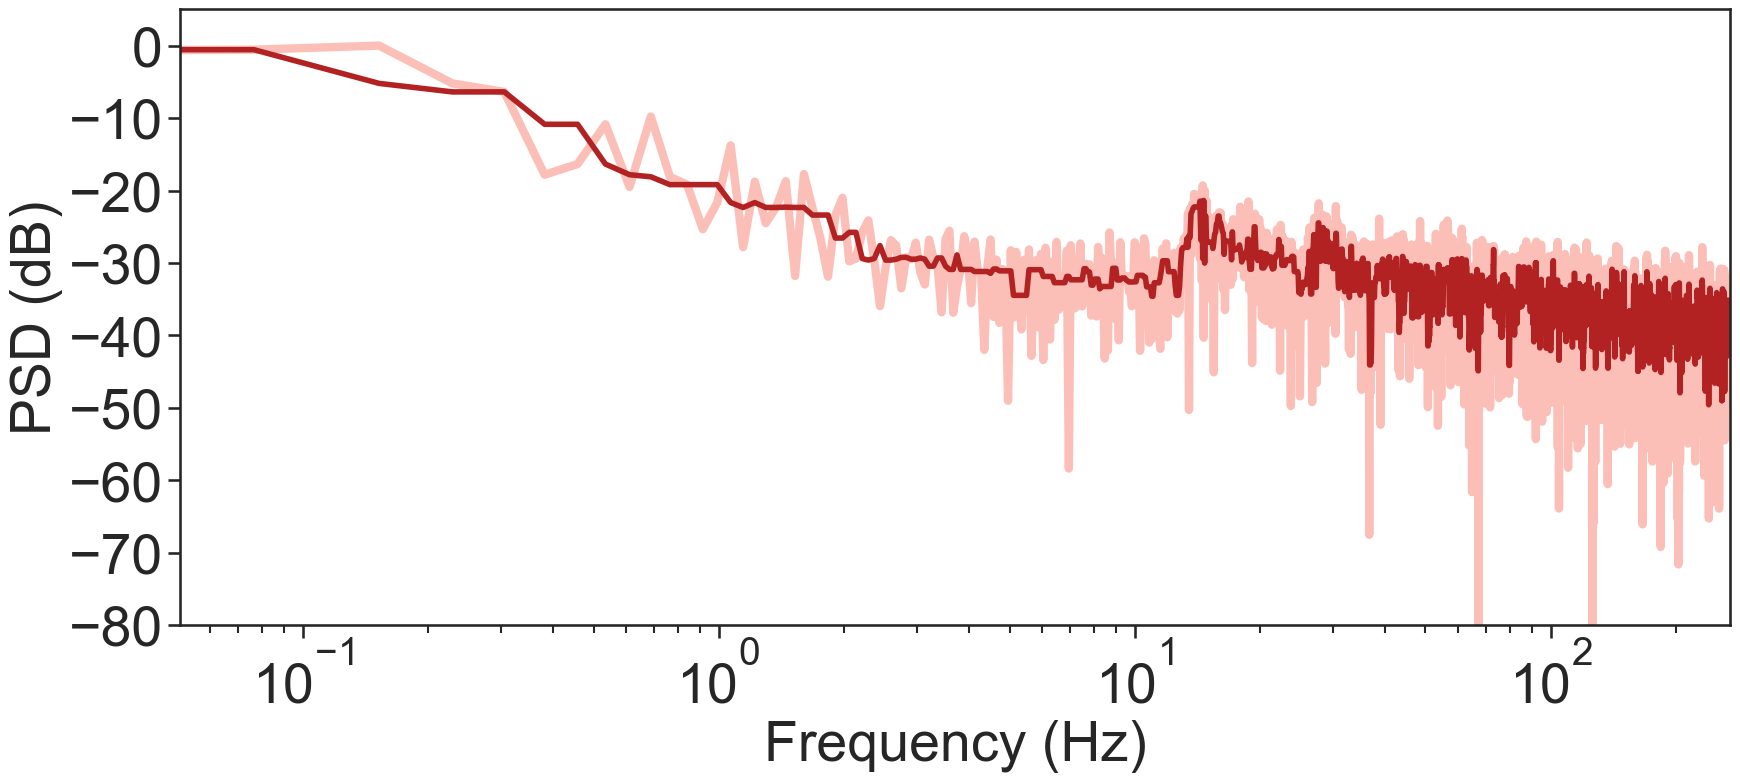

In [47]:
fig1

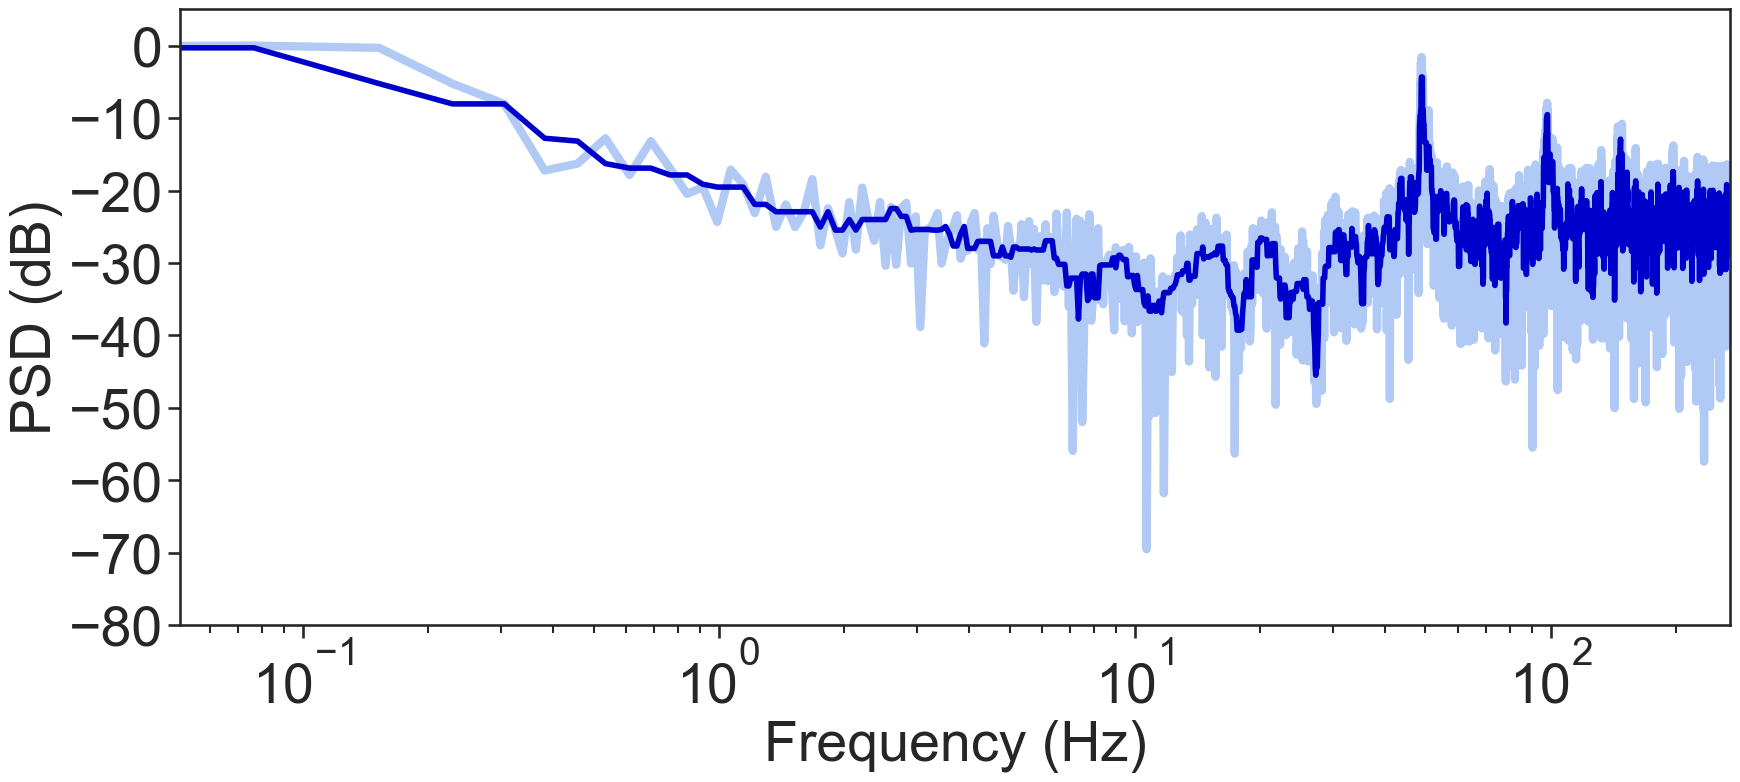

In [48]:
fig2

## Tappered periodogram with Hanning window and Danielle periodogram

In [49]:
fig1,fig2 = NetworkData.TapperedHanningPeriodogramFFT(neuronExcVoltage, neuronInhVoltage)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


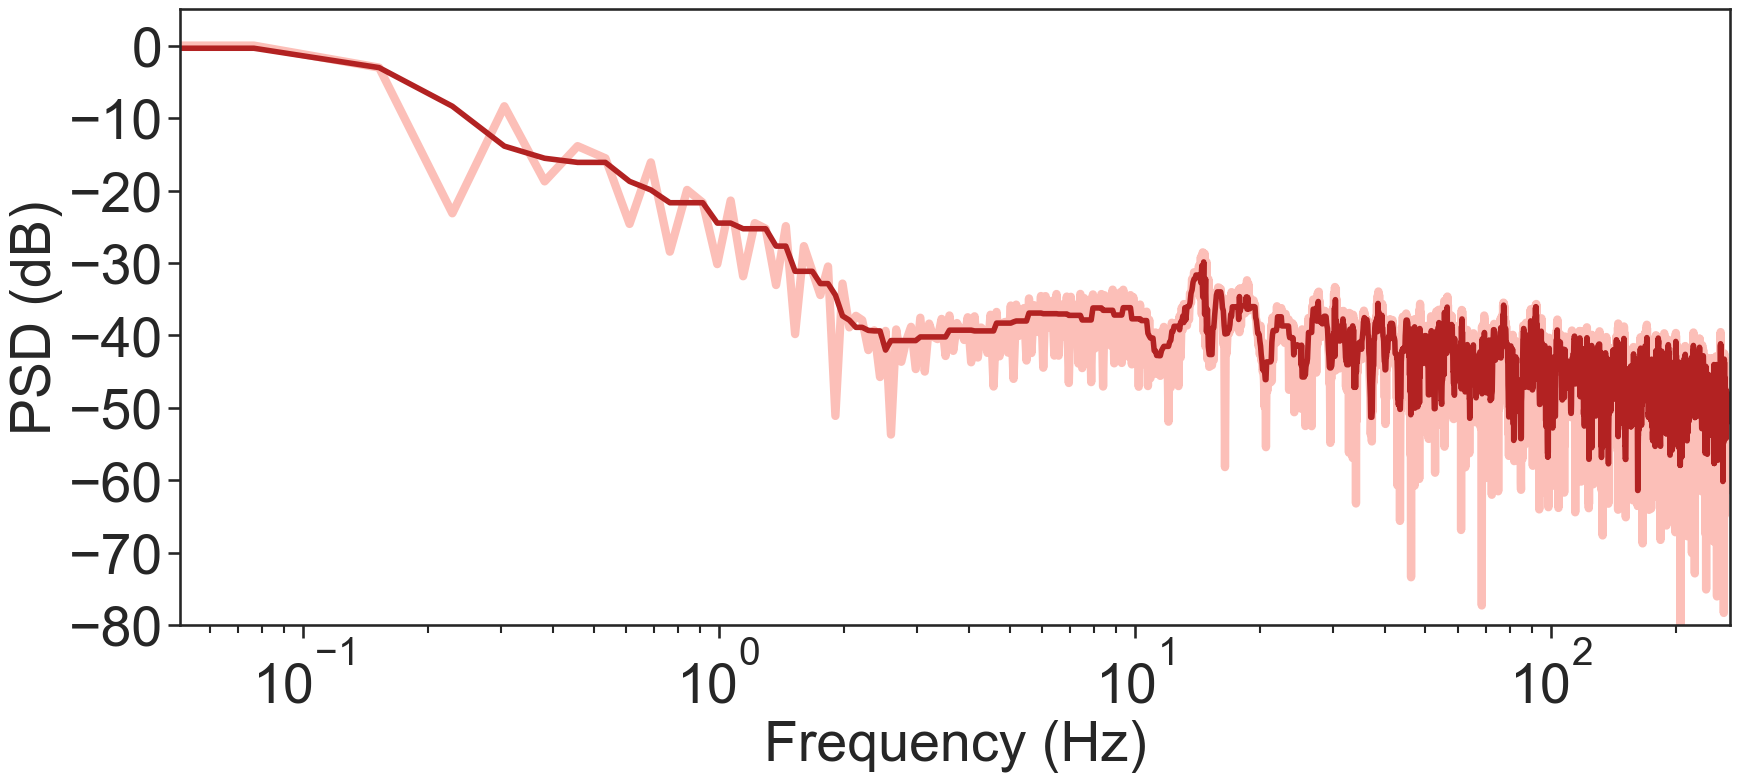

In [50]:
fig1

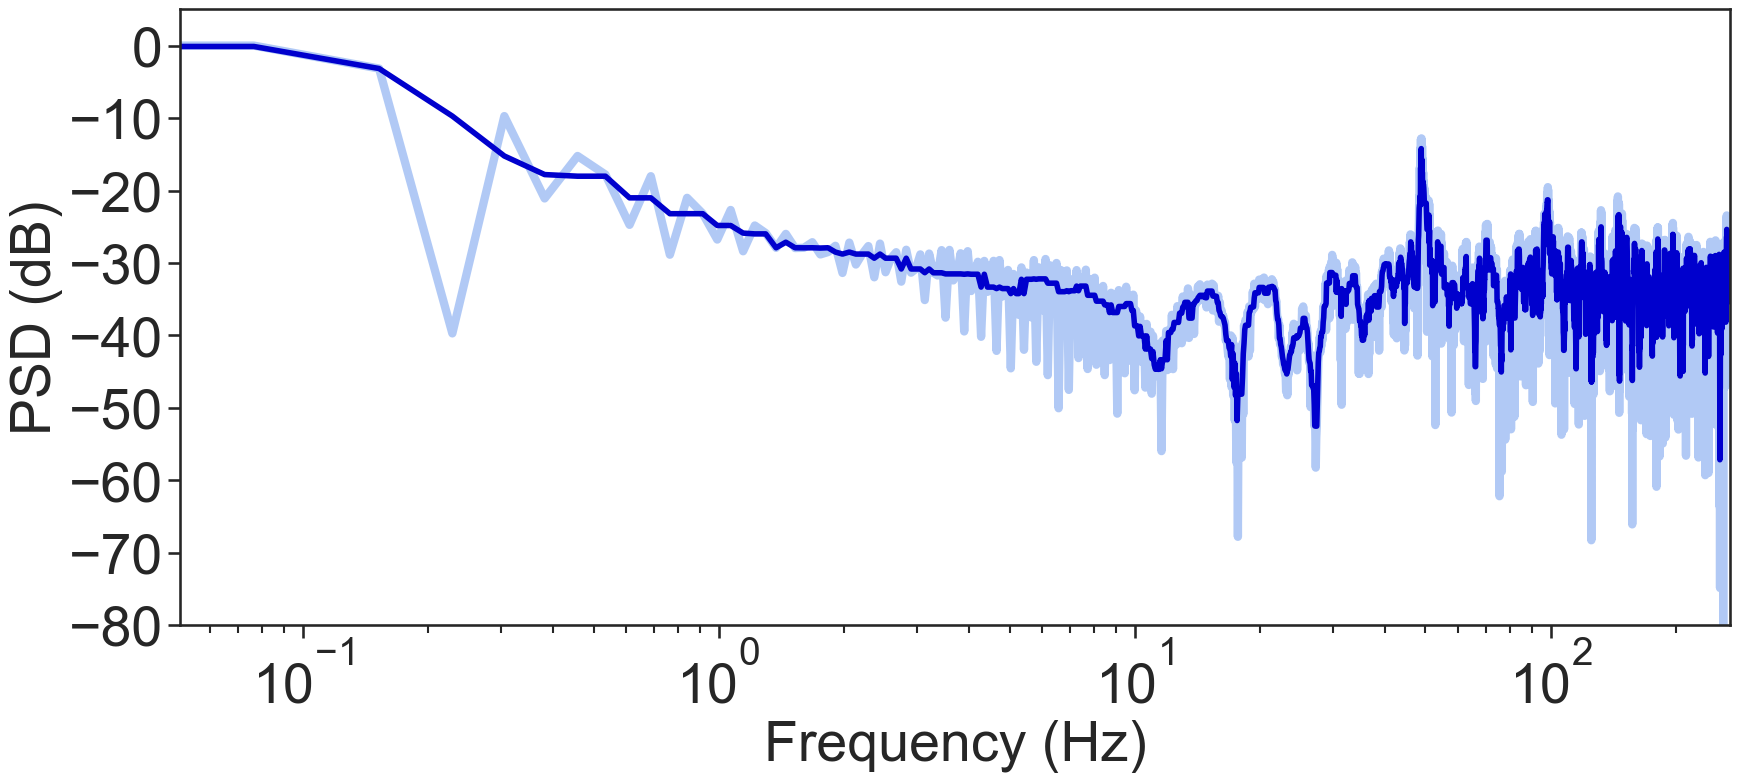

In [51]:
fig2

## Periodogram computed with multitapering method

In [52]:
fig1,fig2 = NetworkData.SpectrumMultitaper(neuronExcVoltage, neuronInhVoltage)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


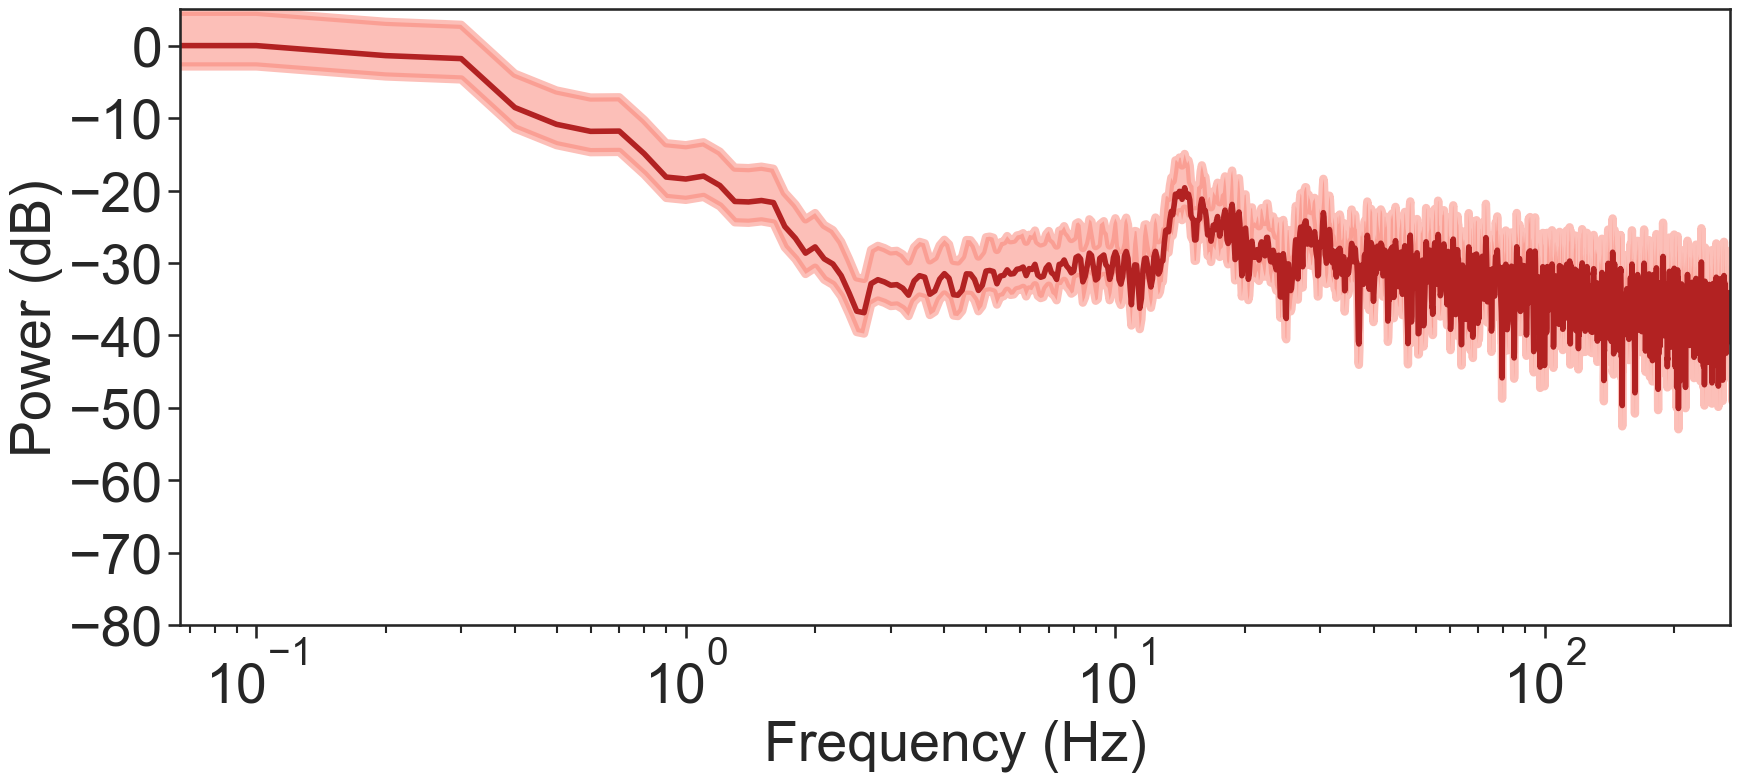

In [53]:
fig1

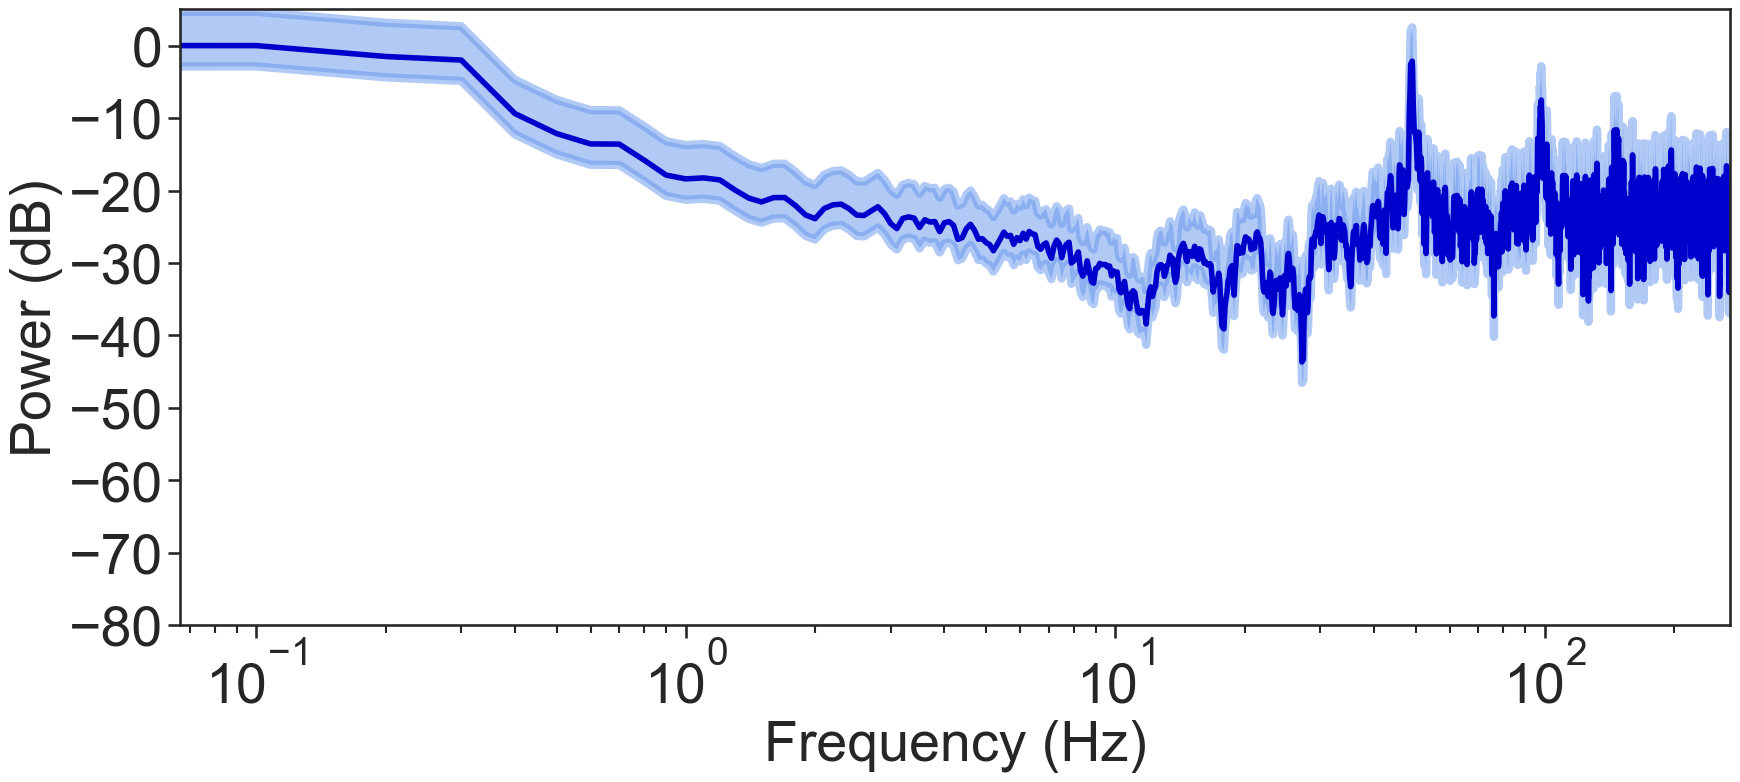

In [54]:
fig2

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]
minvalue_e:  1.4587927230270942e-14
maxvalue_e:  6.659718557326466
minvalue_i:  5.899850960623781e-13
maxvalue_i:  12.77905456582897


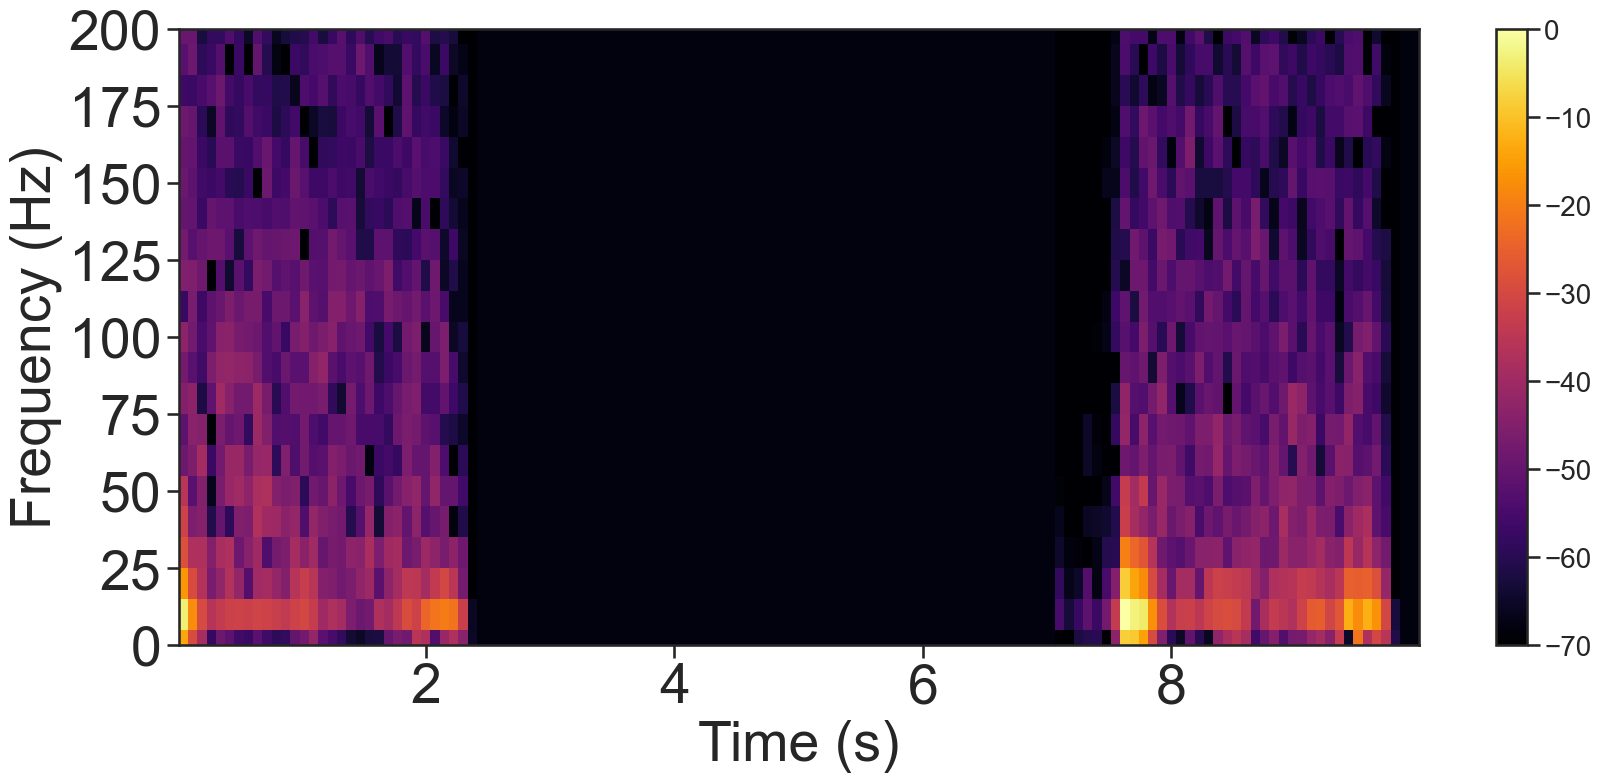

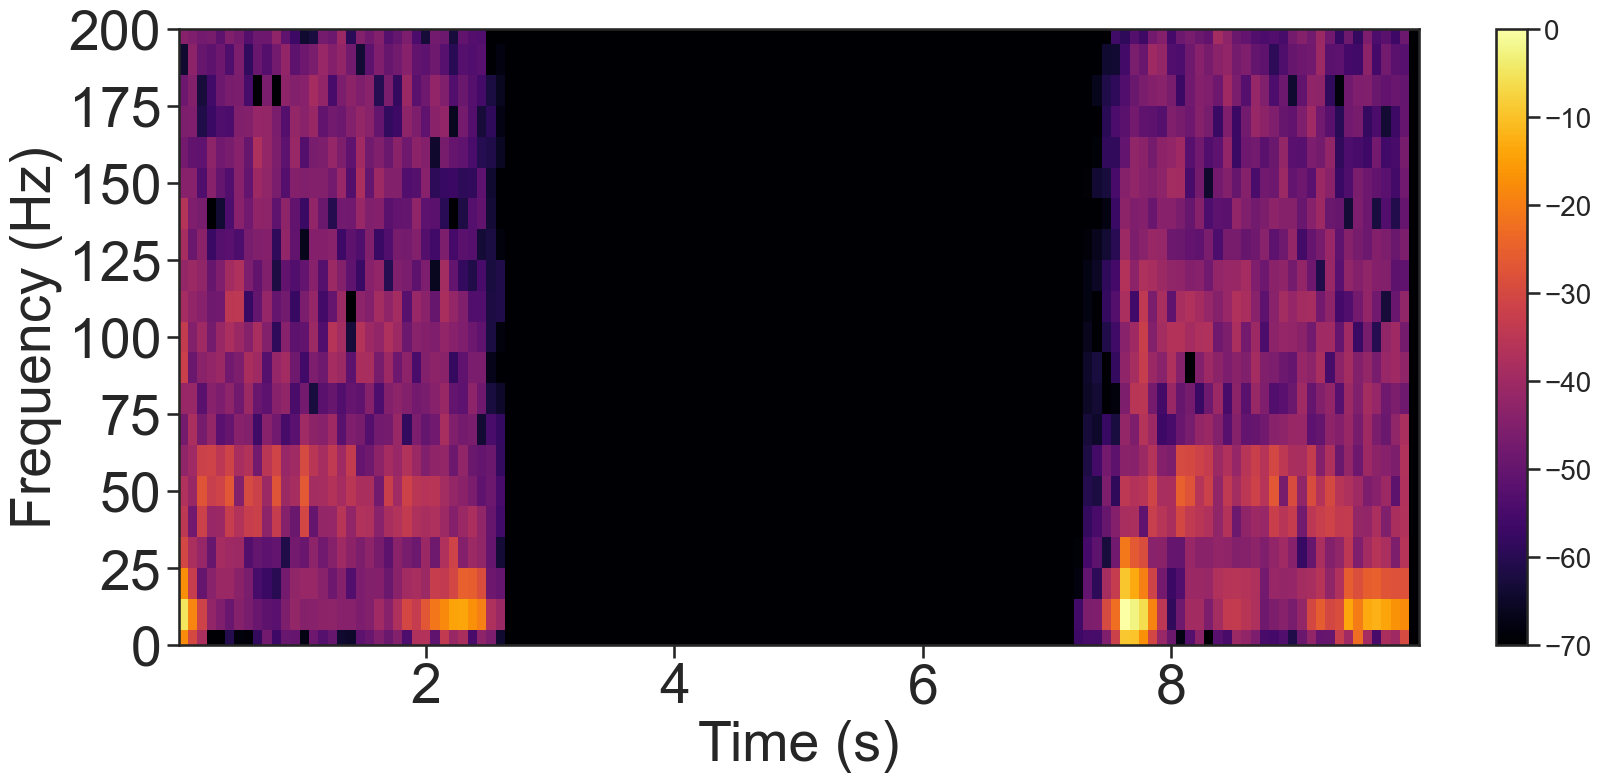

In [55]:
fig1,fig2 = NetworkData.NeuronSpectrogram(Exc_mean,Inh_mean)

## Spectrum Instantaneous Firing Rate excitatory and inhibitory populations

In [56]:
fig1,fig2 = NetworkData.SpectrumMultitaper(Exc_mean,Inh_mean)

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]


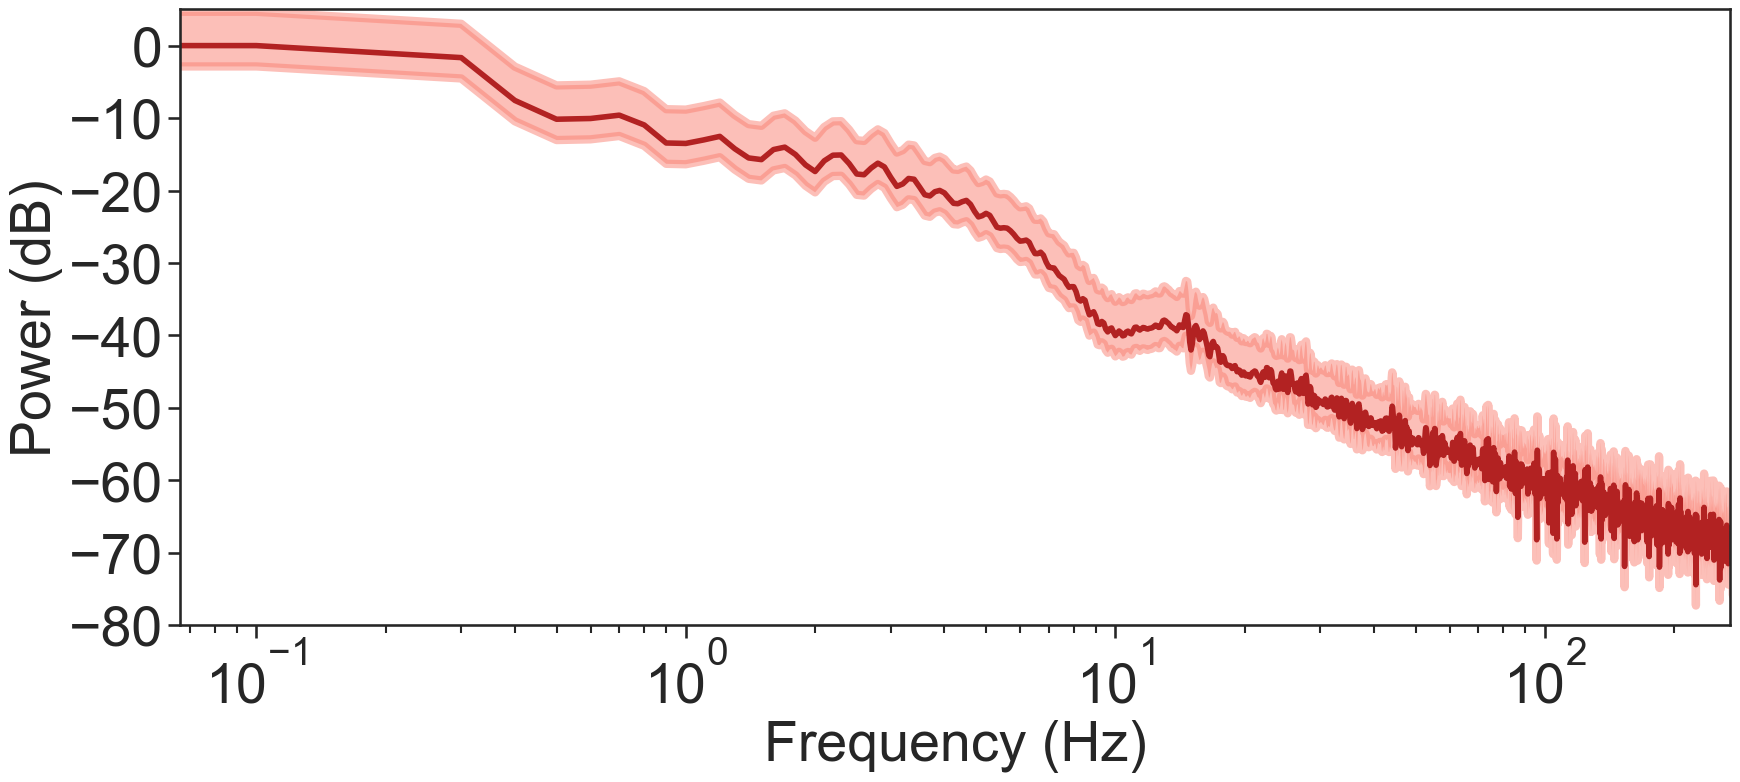

In [57]:
fig1

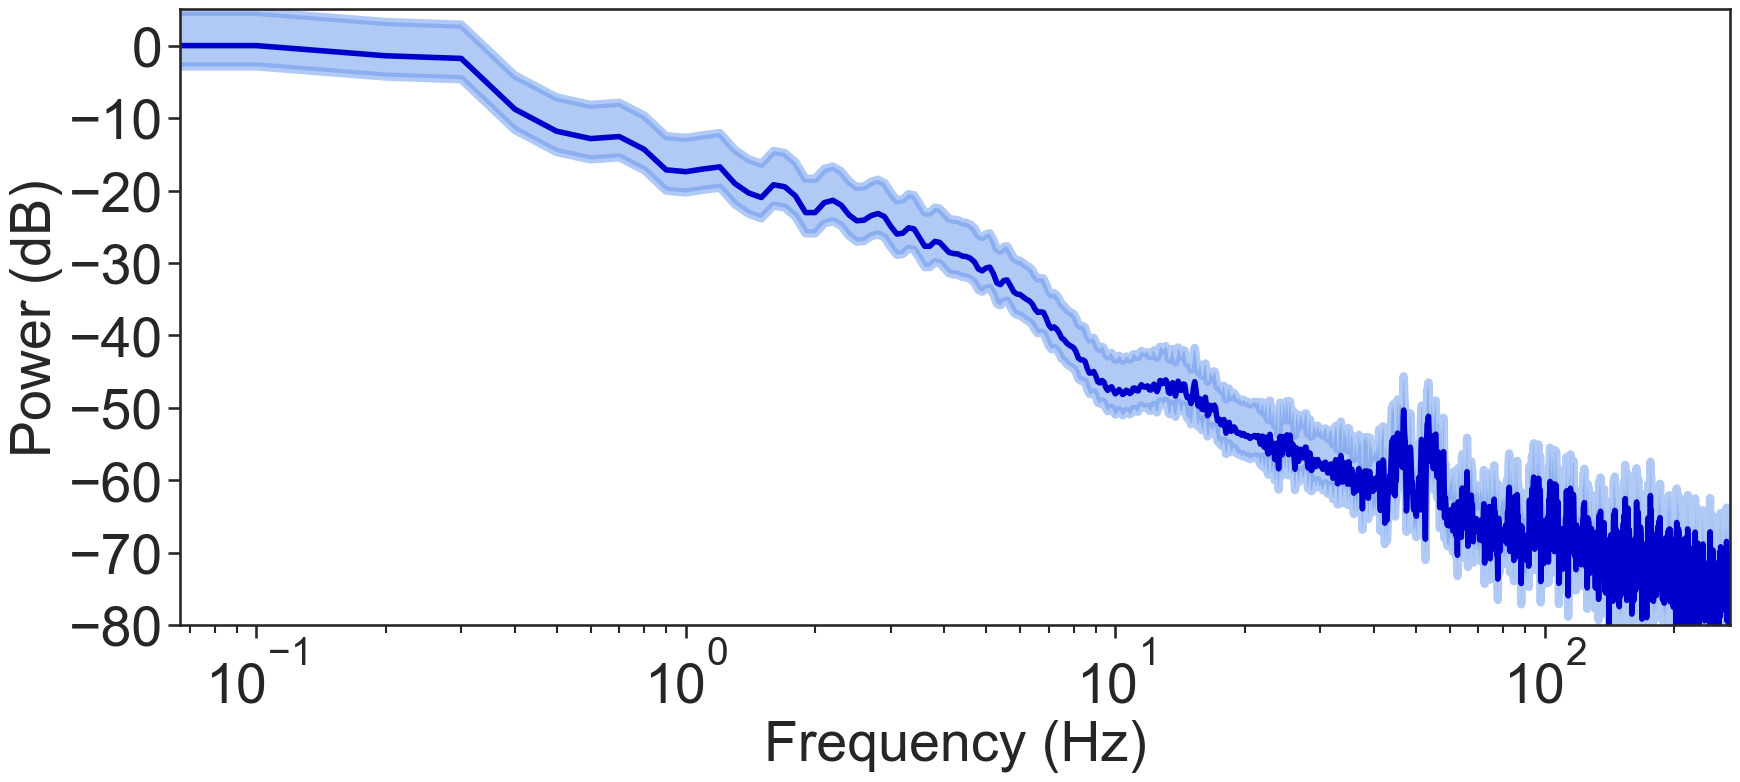

In [58]:
fig2

## Compute spectrum of all neurons in the network

In [59]:
voltage = NetworkData.get_voltage()
foldername="fD"+str(Dnumber)+"_fF"+str(Fnumber)
data = np.load(foldername+"/VoltageData.npz")
voltage = data['voltage']

Number of samples:  200000  [samples]
Total time of the recording 10.0 [s]
Sampling rate:  5e-05 [s]
Frecuency resolution 0.1 [Hz]
Sampling frecuency 20000.0 [Hz]
Nyquist frecuency 10000.0 [Hz]
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
iter 20
iter 21
iter 22
iter 23
iter 24
iter 25
iter 26
iter 27
iter 28
iter 29
iter 30
iter 31
iter 32
iter 33
iter 34
iter 35
iter 36
iter 37
iter 38
iter 39
iter 40
iter 41
iter 42
iter 43
iter 44
iter 45
iter 46
iter 47
iter 48
iter 49
iter 50
iter 51
iter 52
iter 53
iter 54
iter 55
iter 56
iter 57
iter 58
iter 59
iter 60
iter 61
iter 62
iter 63
iter 64
iter 65
iter 66
iter 67
iter 68
iter 69
iter 70
iter 71
iter 72
iter 73
iter 74
iter 75
iter 76
iter 77
iter 78
iter 79
iter 80
iter 81
iter 82
iter 83
iter 84
iter 85
iter 86
iter 87
iter 88
iter 89
iter 90
iter 91
iter 92
iter 93
iter 94
iter 95
iter 96
iter 97
iter 98
iter 99
iter 100
iter 10

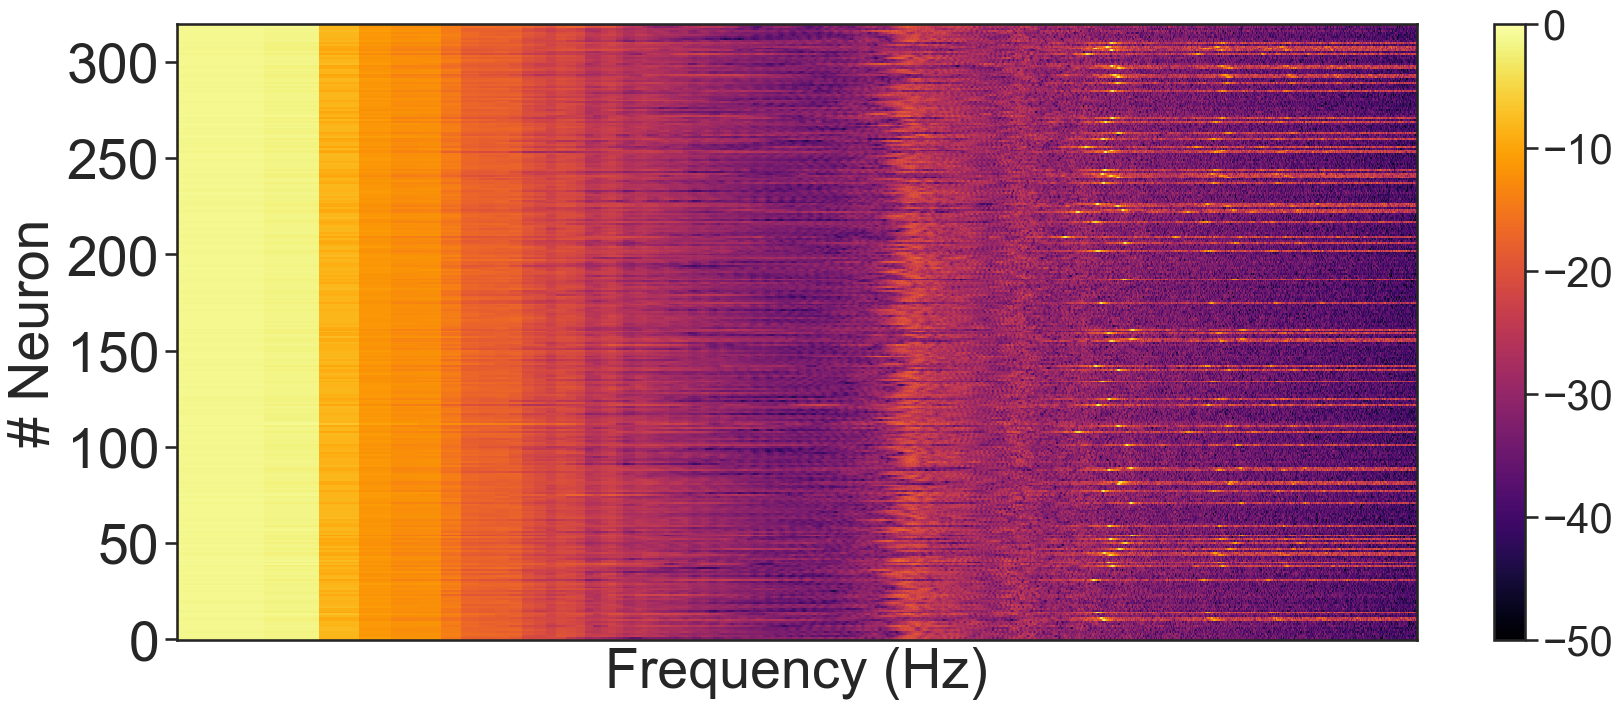

In [63]:
fig = NetworkData.SpectrogramAllNeurons()

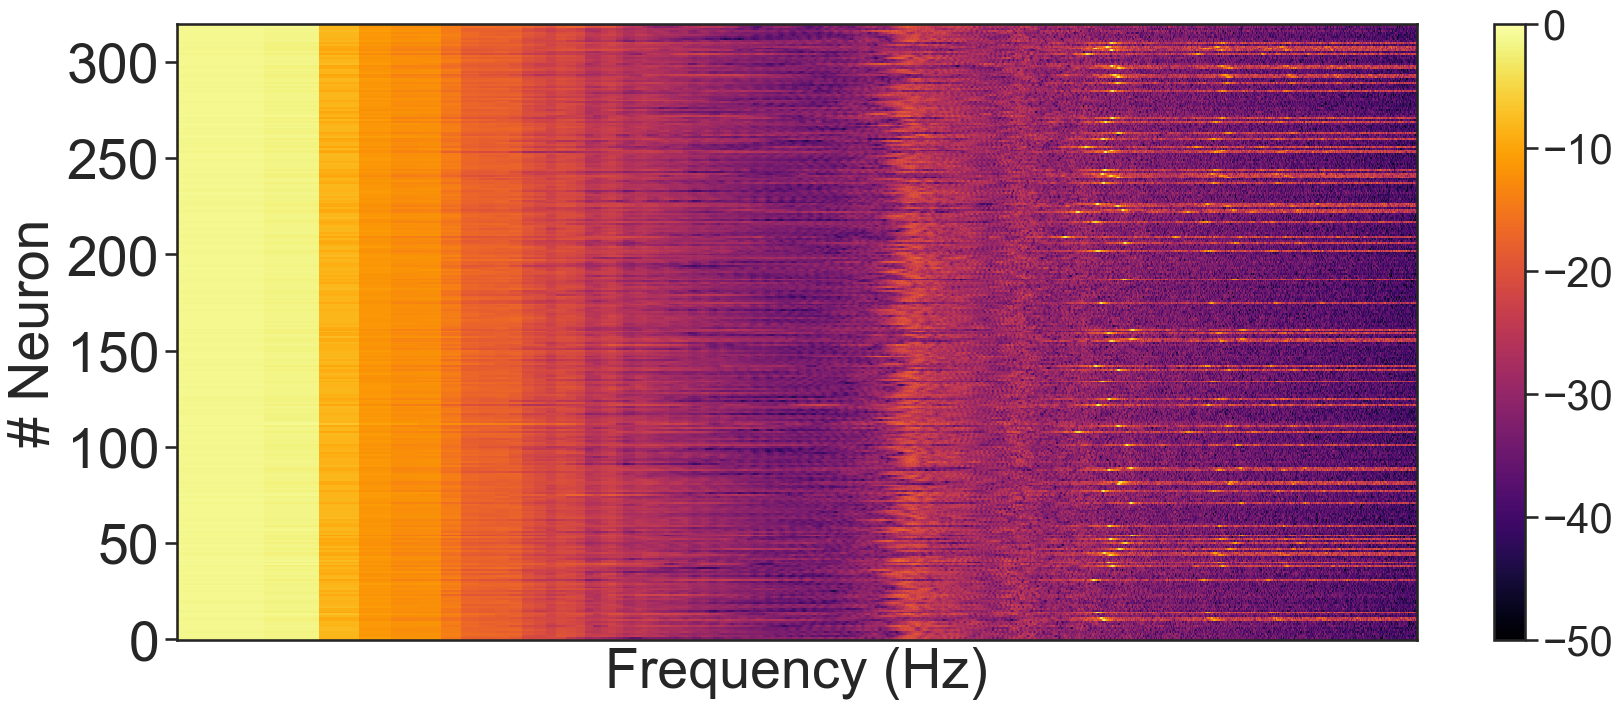

In [64]:
fig

## This code requires a lot of memory to execute

### Please restart the kernel completely and run only the following cells

In [1]:
import time
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import pandas as pd
import seaborn as sns
from scipy import signal
from matplotlib import colormaps
import matplotlib.colors as mcolors
from Tools import IFRnetwork,plot_IFRnetwork

In [2]:
tol=0.05
Dnumber = 0.84
Fnumber = 1
color_dict = mcolors.CSS4_COLORS
ExcColor = color_dict["salmon"]
InhColor = color_dict["cornflowerblue"]
nNeurons=320
file="fD"+str(Dnumber)+"_fF"+str(Fnumber)+"NetworkIFR.npz"
foldername="fD"+str(Dnumber)+"_fF"+str(Fnumber)

In [3]:
data = np.load("Shorttime.npz")
time=data["ti"]

In [4]:
fig = plot_IFRnetwork(file,time,ExcColor,InhColor,nNeurons,foldername,tol)

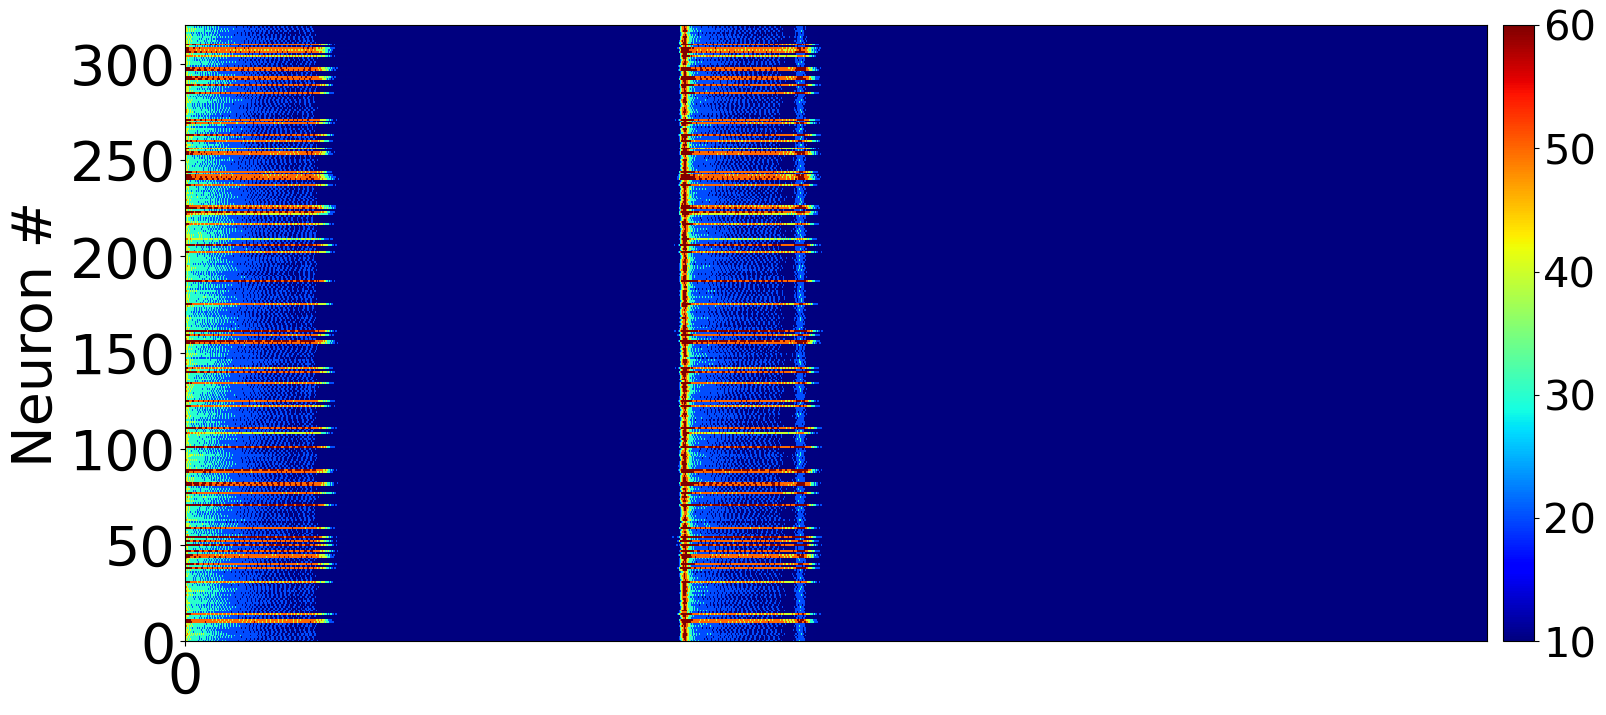

In [5]:
fig